In [30]:
import random,sys, time, pygame
from pygame.locals import *

FPS = 30
WINDOWWIDTH = 640
WINDOWHEIGHT = 480
FLASHSPEED  = 500
FLASHDELAY  = 200
BUTTONSIZE  = 200
BUTTONGAPSIZE = 20
TIMEOUT = 4

WHITE = (255,255,255)
BLACK = (0,0,0)
BRIGHTRED = (0,255,0)
RED = (155,0,0)
BRIGHTGREEN = (0,255,0)
GREEN = (0,155,0)
BRIGHTBLUE = (0,0,255)
BLUE = (0,0,155)
BRIGHTYELLOW = (255,255,0)
YELLOW = (155,155,0)
DARKGRAY = (40,40,40)
bgColor = BLACK

XMARGIN = int((WINDOWWIDTH - (2*BUTTONSIZE) - BUTTONGAPSIZE)/2)
YMARGIN = int((WINDOWHEIGHT - (2*BUTTONSIZE) - BUTTONGAPSIZE)/2)

YELLOWRECT = pygame.Rect(XMARGIN, YMARGIN, BUTTONSIZE, BUTTONSIZE)
BLUERECT = pygame.Rect(XMARGIN + BUTTONSIZE + BUTTONGAPSIZE, YMARGIN, BUTTONSIZE, BUTTONSIZE)
REDRECT = pygame.Rect(XMARGIN, YMARGIN + BUTTONSIZE + BUTTONGAPSIZE, BUTTONSIZE,BUTTONSIZE)
GREENRECT = pygame.Rect(XMARGIN + BUTTONSIZE + BUTTONGAPSIZE,YMARGIN + BUTTONSIZE + BUTTONGAPSIZE,BUTTONSIZE,BUTTONSIZE)

def main():
    global FPSCLOCK, DISPLAYSURF, BASICFONT, BEEP1,BEEP2,BEEP3,BEEP4

    pygame.init()
    FPSCLOCK = pygame.time.Clock()
    DISPLAYSURF = pygame.display.set_mode((WINDOWWIDTH,WINDOWHEIGHT))
    pygame.display.set_caption('Simulate')
    BASICFONT = pygame.font.Font('freesansbold.ttf',16)
    infoSurf = BASICFONT.render('Match the pattern by clicking on btton or using the Q,W,A,S Keys.',1,DARKGRAY)
    infoRect = infoSurf.get_rect()
    infoRect.topleft = (10, WINDOWHEIGHT - 25)

    BEEP1 = pygame.mixer.Sound('beep1.ogg')
    BEEP2 = pygame.mixer.Sound('beep2.ogg')
    BEEP3 = pygame.mixer.Sound('beep3.ogg')
    BEEP4 = pygame.mixer.Sound('beep4.ogg')

    pattern = []
    currentStep = 0
    lastClickTime = 0
    score = 0

    waitingForInput =False
    while True:
        clickedButton = None
        DISPLAYSURF.fill(bgColor)
        drawButtons()

        scoreSurf =BASICFONT.render('Score: '+str(score),1,WHITE)
        scoreRect=scoreSurf.get_rect()
        scoreRect.topleft = (WINDOWWIDTH - 100, 10)
        DISPLAYSURF.blit(scoreSurf,scoreRect)

        checkForQuit()
        for event in pygame.event.get():
            if event.type == MOUSEBUTTONUP:
                mousex,mousey = event.pos
                clickedButton = getButtonClicked(mousex,mousey)
            elif event.type == KEYDOWN:
                if event.key == K_q:
                    clickedButton = YELLOW
                elif event.key == K_w:
                    clickedButton = BLUE
                elif event.key == K_a:
                    clickedButton = RED
                elif event.key == K_s:
                    clickedButton = GREEN
        
        if not waitingForInput:
            pygame.diplay.update()
            pygame.time.wait(1000)
            pattern.append(random.choice((YELLOW,BLUE,RED,GREEN)))
            for button in pattern:
                flashButtonAnimation(button)
                pygame.time.wait(FLASHDELAY)
            waitingForInput=True
        else:
            if clickedButton and clickedButton == pattern[currentStep]:
                flashButtonAnimation(clickedButton)
                currentStep += 1
                lastClickTime = time.time()

                if currentStep == len(pattern):
                    changeBackgroundAnimation()
                    score += 1
                    waitingForInput = False
                    currentStep = 0
            
            elif (clickedButton and clickedButton != pattern[currentStep]) or (currentStep !=0 and time.time() - TIMEOUT > lastClickTime):
                gameOverAnimation()
                pattern=[]
                currentStep=0
                waitingForInput=False
                score=0
                pygame.time.wait(1000)
                changeBackgroundAnimation()
        
        pygame.display.update()
        FPSCLOCK.tick(FPS)

        

pygame 2.6.1 (SDL 2.28.4, Python 3.13.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
import numpy as np
import pandas as pd
import random


<Axes: >

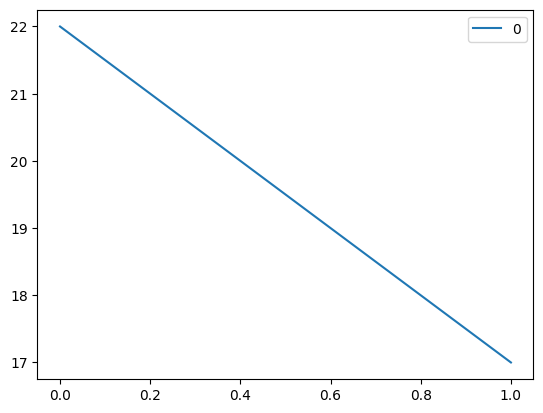

In [10]:
x = np.random.randint(0,100)
y = np.random.randint(0,100)
new_data = [y,x]
df = pd.DataFrame(new_data)
df.plot()

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

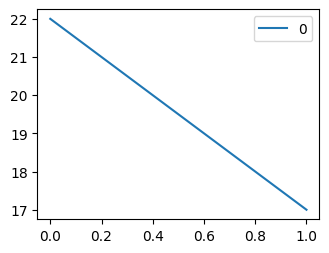

In [13]:
df.plot(subplots=True, figsize=(8,6),layout=(2,2))

<Axes: >

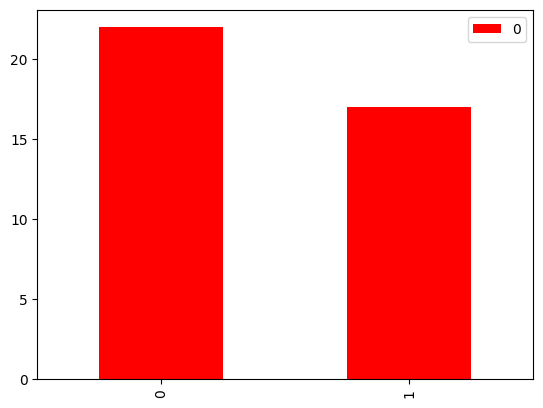

In [14]:
df.plot(kind = 'bar', color = 'red')

In [20]:
df2 = pd.DataFrame(np.random.randn(4,5), columns = ['a', 'b','c','d','e'])
df2

,a,b,c,d,e
0,0.899609,-1.266984,0.360198,1.565518,-1.475405
1,-0.374465,1.626084,0.750741,0.126867,-0.020900
2,0.916062,-0.173335,0.648095,1.296133,0.853705
3,-1.571081,-0.395696,-0.468567,0.485300,1.515273


<Axes: >

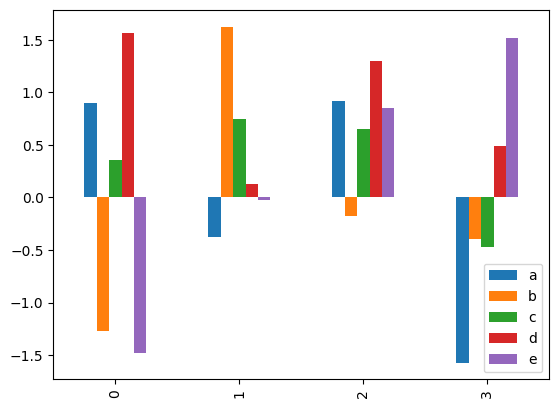

In [22]:
df2.plot(kind = 'bar')

In [23]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001B1AD1F3110>
File:           c:\users\user\appdata\local\packages\pythonsoftwarefoundation.python.3.13_qbz5n2kfra8p0\localcache\local-packages\python313\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - '

<Axes: >

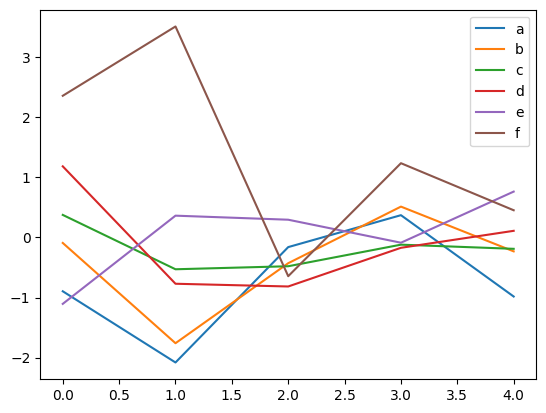

In [29]:
df1= pd.DataFrame(np.random.randn(5,6), columns = ['a','b','c','d','e','f'])
df1.plot(layout=(2,2))

In [34]:
path = './csv/CreditToAgro-Brazil.csv'
fd = pd.read_csv(path)
fd

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,millions,10067.58487,Fc,Calculated data
1,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,millions,9879.41190,Fc,Calculated data
2,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,millions,9861.45346,Fc,Calculated data
3,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,millions,7401.18429,Fc,Calculated data
4,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,millions,6806.63363,Fc,Calculated data
5,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,millions,6772.57630,Fc,Calculated data
6,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2018,2018,millions,6660.18939,Fc,Calculated data


In [35]:
fd.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [40]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       7 non-null      object 
 1   Domain            7 non-null      object 
 2   Area Code         7 non-null      int64  
 3   Area              7 non-null      object 
 4   Element Code      7 non-null      int64  
 5   Element           7 non-null      object 
 6   Item Code         7 non-null      int64  
 7   Item              7 non-null      object 
 8   Year Code         7 non-null      int64  
 9   Year              7 non-null      int64  
 10  Unit              7 non-null      object 
 11  Value             7 non-null      float64
 12  Flag              7 non-null      object 
 13  Flag Description  7 non-null      object 
dtypes: float64(1), int64(5), object(8)
memory usage: 916.0+ bytes


In [46]:
fd['Area Code'].unique()

array([21])

<Axes: ylabel='count'>

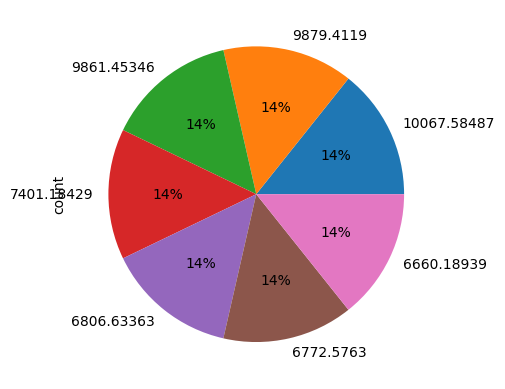

In [50]:
fd['Value'].value_counts().plot(kind='pie',autopct='%.f%%')

In [51]:
fd[:4]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,millions,10067.58487,Fc,Calculated data
1,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,millions,9879.41190,Fc,Calculated data
2,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,millions,9861.45346,Fc,Calculated data
3,IC,Credit to Agriculture,21,Brazil,6110,Value US$,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,millions,7401.18429,Fc,Calculated data


In [53]:
path1 = './csv/ShareOfTotalCredit-World.csv'
don = pd.read_csv(path1)
don

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,1.63329,Fc,Calculated data
1,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,1.78055,Fc,Calculated data
2,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,1.75173,Fc,Calculated data
3,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,1.96151,Fc,Calculated data
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,16.55925,Fc,Calculated data
715,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,17.27422,Fc,Calculated data
716,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,17.15780,Fc,Calculated data
717,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,20.33232,Fc,Calculated data


In [54]:
don[:5]


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,1.63329,Fc,Calculated data
1,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,1.78055,Fc,Calculated data
2,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,1.75173,Fc,Calculated data
3,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,1.96151,Fc,Calculated data
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data


(array([0., 0., 0., 0., 0., 0.]),
 array([ 90., 100., 200., 300., 400., 500., 600.]),
 <BarContainer object of 6 artists>)

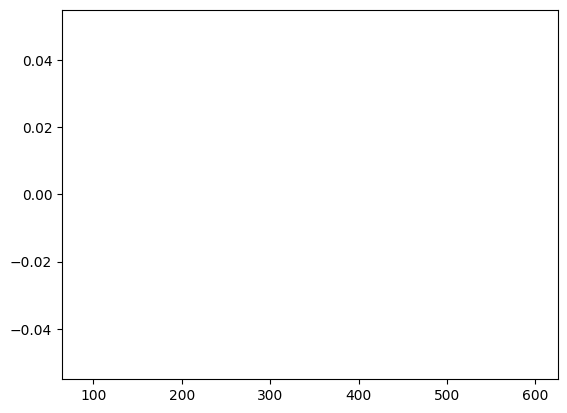

In [62]:
import matplotlib.pyplot as plt

plt.hist(fd['Area Code'], bins=[90,100,200,300,400,500,600])

In [63]:
don.select_dtypes(include='number')

,Area Code,Element Code,Item Code,Year Code,Year,Value
0,3,6113,23068,2012,2012,1.63329
1,3,6113,23068,2013,2013,1.78055
2,3,6113,23068,2014,2014,1.75173
3,3,6113,23068,2015,2015,1.96151
4,7,6113,23068,2012,2012,2.92667
...,...,...,...,...,...,...
714,251,6113,23068,2014,2014,16.55925
715,251,6113,23068,2015,2015,17.27422
716,251,6113,23068,2016,2016,17.15780
717,251,6113,23068,2017,2017,20.33232


In [64]:
don[:15]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,1.63329,Fc,Calculated data
1,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,1.78055,Fc,Calculated data
2,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,1.75173,Fc,Calculated data
3,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,1.96151,Fc,Calculated data
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
5,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,2.97138,Fc,Calculated data
6,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,4.33305,Fc,Calculated data
7,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,5.04558,Fc,Calculated data
8,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,6.35645,Fc,Calculated data
9,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,6.08970,Fc,Calculated data


In [65]:
don.select_dtypes(include='object')

,Domain Code,Domain,Area,Element,Item,Unit,Flag,Flag Description
0,IC,Credit to Agriculture,Albania,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
1,IC,Credit to Agriculture,Albania,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
2,IC,Credit to Agriculture,Albania,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
3,IC,Credit to Agriculture,Albania,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
4,IC,Credit to Agriculture,Angola,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
...,...,...,...,...,...,...,...,...
714,IC,Credit to Agriculture,Zambia,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
715,IC,Credit to Agriculture,Zambia,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
716,IC,Credit to Agriculture,Zambia,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data
717,IC,Credit to Agriculture,Zambia,Share of Total Credit,"Credit to Agriculture, Forestry and Fishing",%,Fc,Calculated data


<Axes: >

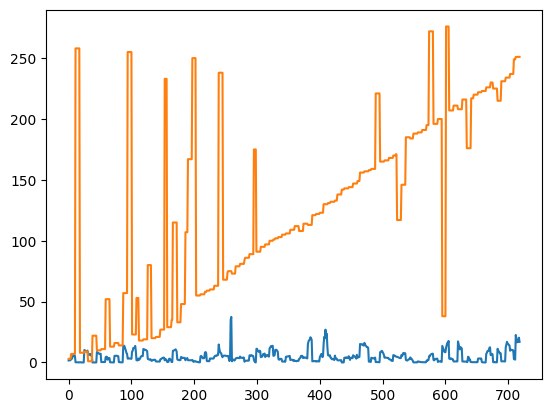

In [71]:
don['Value'].plot()
don['Area Code'].plot()
# don['Year'].plot()

In [74]:
don[don['Value']>2]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
5,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,2.97138,Fc,Calculated data
6,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,4.33305,Fc,Calculated data
7,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,5.04558,Fc,Calculated data
8,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,6.35645,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,16.55925,Fc,Calculated data
715,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,17.27422,Fc,Calculated data
716,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,17.15780,Fc,Calculated data
717,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,20.33232,Fc,Calculated data


<Axes: >

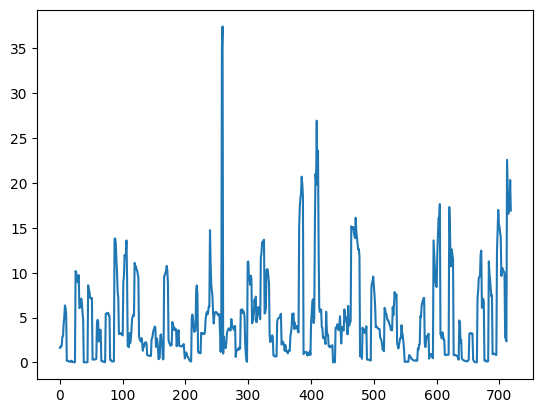

In [76]:
don['Value'].plot()

In [77]:
don.query('Area=="Zambia"')

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
712,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,22.57741,Fc,Calculated data
713,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,19.70899,Fc,Calculated data
714,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,16.55925,Fc,Calculated data
715,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,17.27422,Fc,Calculated data
716,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,17.15780,Fc,Calculated data
717,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,20.33232,Fc,Calculated data
718,IC,Credit to Agriculture,251,Zambia,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2018,2018,%,16.93153,Fc,Calculated data


<Axes: >

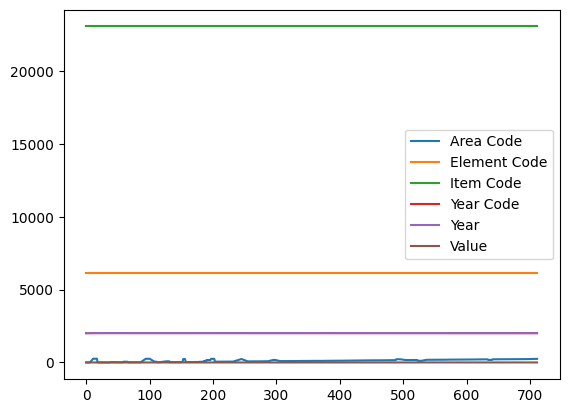

In [89]:
don[don['Value']<5].plot()

In [96]:
don[(don['Area Code']<9) | (don['Value']<2)]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,1.63329,Fc,Calculated data
1,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,1.78055,Fc,Calculated data
2,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,1.75173,Fc,Calculated data
3,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,1.96151,Fc,Calculated data
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,IC,Credit to Agriculture,231,United States of America,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,0.99366,Fc,Calculated data
692,IC,Credit to Agriculture,231,United States of America,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,0.97075,Fc,Calculated data
693,IC,Credit to Agriculture,231,United States of America,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,0.89556,Fc,Calculated data
694,IC,Credit to Agriculture,231,United States of America,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,0.86313,Fc,Calculated data


In [98]:
don[:10]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,1.63329,Fc,Calculated data
1,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,1.78055,Fc,Calculated data
2,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,1.75173,Fc,Calculated data
3,IC,Credit to Agriculture,3,Albania,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,1.96151,Fc,Calculated data
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
5,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,2.97138,Fc,Calculated data
6,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,4.33305,Fc,Calculated data
7,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2015,2015,%,5.04558,Fc,Calculated data
8,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2016,2016,%,6.35645,Fc,Calculated data
9,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2017,2017,%,6.08970,Fc,Calculated data


In [103]:
don.groupby(['Area']).max()['Value']

Area
Albania                      1.96151
Angola                       6.35645
Anguilla                     0.18238
Antigua and Barbuda          0.19389
Argentina                   10.19818
                              ...   
United States of America     0.99366
Uruguay                     16.99798
Viet Nam                    10.52681
Yemen                        2.78189
Zambia                      22.57741
Name: Value, Length: 117, dtype: float64

In [106]:
don[(don['Area'] == 'Angola') & (don['Value'] < 5) ]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
4,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2012,2012,%,2.92667,Fc,Calculated data
5,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2013,2013,%,2.97138,Fc,Calculated data
6,IC,Credit to Agriculture,7,Angola,6113,Share of Total Credit,23068,"Credit to Agriculture, Forestry and Fishing",2014,2014,%,4.33305,Fc,Calculated data


In [108]:
new_path = './csv/covid-variants.csv'
daf = pd.read_csv(new_path)
daf

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [125]:
#compare two locations for a varient
loc1 = 'United States'
loc2 = 'United Kingdom'
var = 'Delta'

In [127]:
dt_loc = daf[(daf['variant'] == var) & (daf['location'].isin([loc1, loc2]))]
dt_loc

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
95699,United Kingdom,2020-05-11,Delta,0,0.00,4753
95723,United Kingdom,2020-05-25,Delta,0,0.00,2767
95747,United Kingdom,2020-06-08,Delta,0,0.00,1761
95771,United Kingdom,2020-06-22,Delta,0,0.00,4716
95795,United Kingdom,2020-07-06,Delta,0,0.00,2286
...,...,...,...,...,...,...
97739,United States,2021-11-15,Delta,116690,99.38,117419
97763,United States,2021-11-29,Delta,99539,99.26,100281
97787,United States,2021-12-13,Delta,98446,96.11,102430
97811,United States,2021-12-27,Delta,24395,49.55,49235


In [129]:
loc = dt_loc.groupby(['location'])['num_sequences']
loc

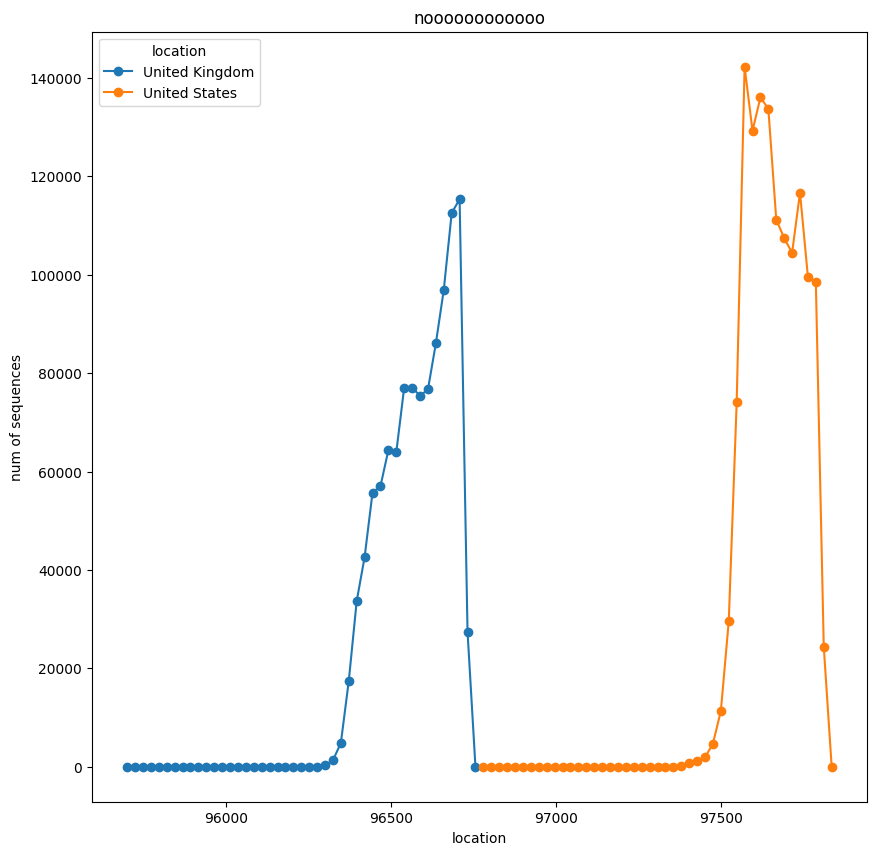

In [130]:
loc.plot(kind='line',figsize=(10,10),marker = 'o')
plt.title('noooooooooooo')
plt.xlabel('location')
plt.ylabel('num of sequences')
plt.legend(title='location')
plt.show()